In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

# 設定 data_path
dir_data = './data/'

In [2]:
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

## 練習時間

觀察有興趣的欄位的資料分佈，並嘗試找出有趣的訊息
#### Eg
- 計算任意欄位的平均數及標準差
- 畫出任意欄位的[直方圖](https://zh.wikipedia.org/zh-tw/%E7%9B%B4%E6%96%B9%E5%9B%BE)

### Hints:
- [Descriptive Statistics For pandas Dataframe](https://chrisalbon.com/python/data_wrangling/pandas_dataframe_descriptive_stats/)
- [pandas 中的繪圖函數](https://amaozhao.gitbooks.io/pandas-notebook/content/pandas%E4%B8%AD%E7%9A%84%E7%BB%98%E5%9B%BE%E5%87%BD%E6%95%B0.html)


In [6]:
df = pd.DataFrame(app_train['AMT_INCOME_TOTAL'])
df.describe()

,AMT_INCOME_TOTAL
count,3.075110e+05
mean,1.687979e+05
std,2.371231e+05
min,2.565000e+04
25%,1.125000e+05
50%,1.471500e+05
75%,2.025000e+05
max,1.170000e+08


In [5]:
sub_train = app_train.loc[:, ['NAME_CONTRACT_TYPE',"AMT_CREDIT", "AMT_INCOME_TOTAL", 'AMT_GOODS_PRICE']]
sub_train.head()

,NAME_CONTRACT_TYPE,AMT_CREDIT,AMT_INCOME_TOTAL,AMT_GOODS_PRICE
0,Cash loans,406597.5,202500.0,351000.0
1,Cash loans,1293502.5,270000.0,1129500.0
2,Revolving loans,135000.0,67500.0,135000.0
3,Cash loans,312682.5,135000.0,297000.0
4,Cash loans,513000.0,121500.0,513000.0


In [9]:
# 用 NAME_CONTRACT_TYPE 分類 來看跟 AMT_CREDIT的關係
sub_train.groupby("NAME_CONTRACT_TYPE")['AMT_CREDIT'].describe()

,count,mean,std,min,25%,50%,75%,max
NAME_CONTRACT_TYPE,,,,,,,,
Cash loans,278232.0,627965.732538,405407.037794,45000.0,297000.0,540000.0,835380.0,4050000.0
Revolving loans,29279.0,324017.982172,236693.485603,135000.0,180000.0,270000.0,360000.0,2250000.0


In [36]:
app_train.head()
dataset = {'AMT_CREDIT': app_train['AMT_CREDIT'], 'Income':app_train['AMT_INCOME_TOTAL'], 'GOODs_price': app_train['AMT_GOODS_PRICE']}
dataset = pd.DataFrame(dataset)
dataset.corr()

,AMT_CREDIT,Income,GOODs_price
AMT_CREDIT,1.000000,0.15687,0.986968
Income,0.156870,1.00000,0.159610
GOODs_price,0.986968,0.15961,1.000000


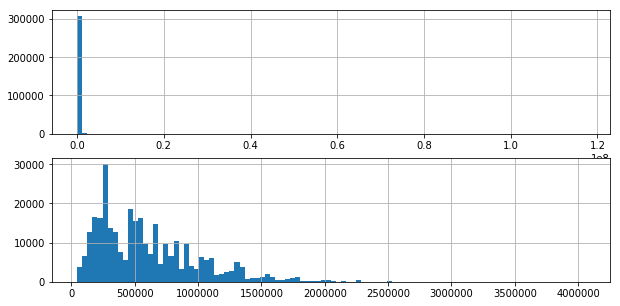

In [32]:
plt.figure(figsize=(10, 5))
plt.subplot(211)
# my_x_ticks = np.arange(0, sub_train["AMT_INCOME_TOTAL"].max(), 100000)
# plt.hist(sub_train["AMT_INCOME_TOTAL"], bins = 100, color = "black")
sub_train["AMT_INCOME_TOTAL"].hist(bins=100)
# plt.xticks(my_x_ticks)
plt.subplot(212)
app_train['AMT_CREDIT'].hist(bins=100)

In [40]:
sub_train["AMT_INCOME_TOTAL"].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

(0, 643044.2118546574)

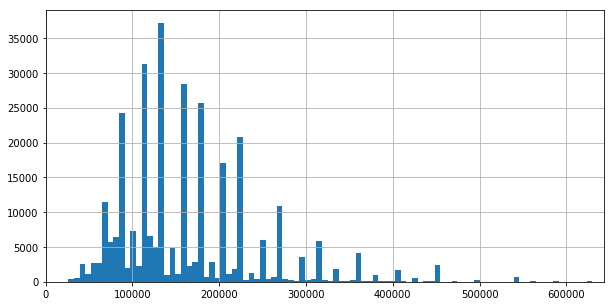

In [45]:
# 由上圖可以發現，AMT_INCOME_TOTAL 的組間差異過大，會導致hist呈現不詳細
# 加上 x 軸 限制


# bin_list = []
# for i in range(20):
#     bin_list.append(i*10000)

# 大部分的數值(95%)都會落在 mean + 2std之間
maxlim = sub_train["AMT_INCOME_TOTAL"].mean() + sub_train["AMT_INCOME_TOTAL"].std()*2
bin_list = np.linspace(0,maxlim, 100)

plt.figure(figsize=(10, 5))
# my_x_ticks = np.arange(0, sub_train["AMT_INCOME_TOTAL"].max(), 100000)
# plt.hist(sub_train["AMT_INCOME_TOTAL"], bins = 100, color = "black")
sub_train["AMT_INCOME_TOTAL"].hist(bins=bin_list)
plt.xlim([0, maxlim])